## K-means Segmentation

In [1]:
import numpy as np 
import random
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

아래 k_means_segmentation 클래스는 다음 링크에서 가져옴

https://gmnam.tistory.com/168

In [2]:
class k_means_segmentation:
    def __init__(self, img_path):
        self.img_path = img_path 
        original_image = cv2.imread(self.img_path)
        self.img = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
        self.vectorized = self.img.reshape((-1,3))
        self.vectorized = np.float32(self.vectorized)

    
    def process(self, K, attempts):
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

        ret,label,center = cv2.kmeans(self.vectorized, 
                                      K, 
                                      None, 
                                      criteria, 
                                      attempts, 
                                      cv2.KMEANS_PP_CENTERS)    # cv2.KMEANS_RANDOM_CENTERS

        center = np.uint8(center)
        res = center[label.flatten()]
        self.result_image = res.reshape((self.img.shape))
              
        figure_size = 15
        plt.figure(figsize=(figure_size,figure_size))
        plt.subplot(1,2,1),plt.imshow(self.img)
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(1,2,2),plt.imshow(self.result_image)
        plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
        plt.show()
        
        return self.result_image

In [3]:
name = '6107710_RL.png'
img_path = "./BP images/{}".format(name)
segmentation = k_means_segmentation(img_path)

In [4]:
# K=2
# seg_2_color_img = segmentation.process(K, attempts=10)

# save_path = './kmeans_seg/{0}_K{1}.png'.format(name[:-4], K)
# cv2.imwrite(save_path, seg_2_color_img)

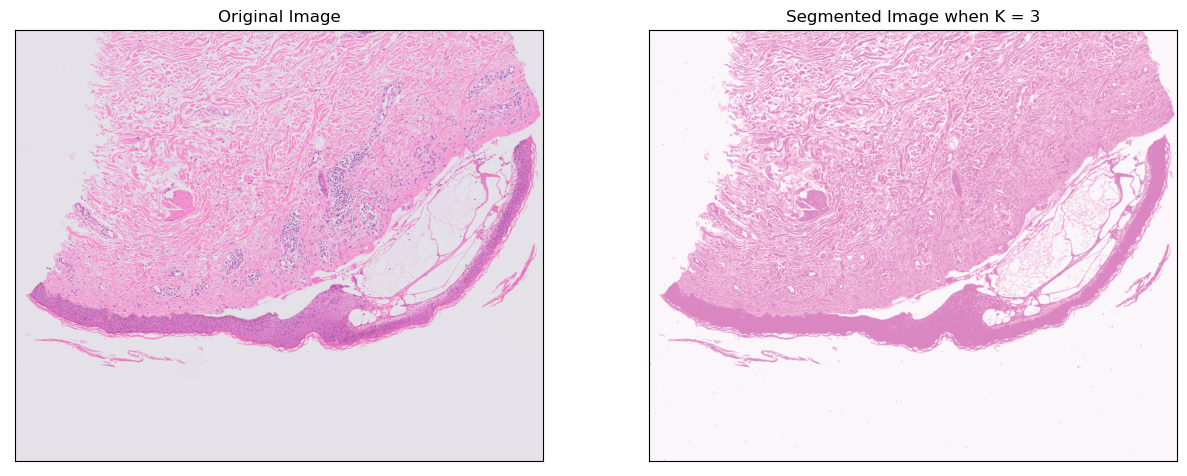

True

In [6]:
K=3
seg_3_color_img = segmentation.process(K, attempts=10)

save_path = './kmeans_seg/{0}_K{1}.png'.format(name[:-4], K)
cv2.imwrite(save_path, seg_3_color_img)

In [5]:
# K=4
# seg_4_color_img = segmentation.process(K, attempts=10)

# save_path = './kmeans_seg/{0}_K{1}.png'.format(name[:-4], K)
# cv2.imwrite(save_path, seg_4_color_img)